</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

In [1]:
import sys
sys.path.append("/Users/pauljacob/Library/Python/3.8/lib/python/site-packages")

In [2]:
!pip3 install ipython-autotime --quiet


In [3]:
%load_ext autotime

time: 288 µs (started: 2022-10-11 12:54:40 -07:00)


In [4]:
!pip3 install cookiecutter

Defaulting to user installation because normal site-packages is not writeable
time: 1.26 s (started: 2022-10-11 12:54:40 -07:00)


In [5]:
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

time: 492 ms (started: 2022-10-11 12:54:41 -07:00)


In [6]:
from in_vehicle_coupon_recommendation import initialize_custom_notebook_settings
initialize_custom_notebook_settings()

time: 3.92 ms (started: 2022-10-11 12:54:42 -07:00)


In [7]:
%%time
import pandas as pd
import os
import sqlite3
import numpy as np
import pickle
from functools import reduce


#plots
import matplotlib.pyplot as plt
import seaborn as sns

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

#modeling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn import __version__ as sklearn_version
import datetime
import pickle


CPU times: user 598 ms, sys: 64.9 ms, total: 663 ms
Wall time: 788 ms
time: 789 ms (started: 2022-10-11 12:54:42 -07:00)


In [8]:
import pandas as pd
import os
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
p(df)

(12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0


time: 14.2 ms (started: 2022-10-11 12:54:43 -07:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [10]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})



#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)



#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]



#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)



#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]
#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})



#dealing with missing values:
    #solution1: fill in missing values with 'no response' or 'unknown'
    #solution2: fillna with mode of column
    #solution3: use other features to predict what NaN values of occurences per month variables
    #solution4: drop the rows that have null values

#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')
p(df)

(12684, 24)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,1,1,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0


time: 75.9 ms (started: 2022-10-11 12:54:43 -07:00)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   destination                 12684 non-null  object
 1   passenger                   12684 non-null  object
 2   weather                     12684 non-null  object
 3   temperature                 12684 non-null  int64 
 4   time                        12684 non-null  object
 5   coupon_venue_type           12684 non-null  object
 6   expiration                  12684 non-null  object
 7   gender                      12684 non-null  object
 8   age                         12684 non-null  object
 9   maritalStatus               12684 non-null  object
 10  has_children                12684 non-null  int64 
 11  education                   12684 non-null  object
 12  occupation                  12684 non-null  object
 13  income                      12684 non-null  ob

In [12]:
#df.loc[df.loc[:, column_name_list[0]].isnull(), :].shape

#did they not know how to answer the question??, confused by the question????, how did they respond to other questions???, null values should be filled with some other categorical value??? like 'no answer'

################################################################

# #drop 'car' column or fill null values with 'N/A'
# car_column_drop = False

# if car_column_drop == True:
#     #drop car column
#     column_name_list = df.columns.to_list()
#     column_name_list_not_car = [k for k in column_name_list if k not in ['car']]
#     df = df.loc[:, column_name_list_not_car]
# elif car_column_drop == False and 'car' in df.columns:
#     df.loc[:, 'car'] = df.loc[:, 'car'].fillna('N/A')
# else:
#     print('error')
    
# p(df)

time: 396 µs (started: 2022-10-11 12:54:43 -07:00)


In [13]:
#plt.scatter(data=df.loc[:, ['direction_same', 'direction_opp']], x='direction_same', y='direction_opp')

time: 170 µs (started: 2022-10-11 12:54:43 -07:00)


In [14]:
#(df.loc[:, 'direction_same'] + df.loc[:, 'direction_opp']).value_counts()

time: 163 µs (started: 2022-10-11 12:54:43 -07:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [15]:
#Exploratory Data Analysis

time: 130 µs (started: 2022-10-11 12:54:43 -07:00)


In [16]:
df.loc[:, 'car'].value_counts()

no response                                 12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

time: 3.11 ms (started: 2022-10-11 12:54:43 -07:00)


In [17]:
df.loc[:, 'destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

time: 2.68 ms (started: 2022-10-11 12:54:43 -07:00)


In [18]:
df.loc[:, 'passenger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64

time: 2.52 ms (started: 2022-10-11 12:54:43 -07:00)


In [19]:
df.loc[:, 'weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

time: 2.4 ms (started: 2022-10-11 12:54:43 -07:00)


In [20]:
df.loc[:, 'temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

time: 1.97 ms (started: 2022-10-11 12:54:43 -07:00)


In [21]:
df.loc[:, 'time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

time: 2.78 ms (started: 2022-10-11 12:54:43 -07:00)


In [22]:
df.loc[:, 'coupon_venue_type'].value_counts() #######???????????? coupon type

#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon_venue_type, dtype: int64

time: 2.65 ms (started: 2022-10-11 12:54:43 -07:00)


In [23]:
df.loc[:, 'expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

time: 2.55 ms (started: 2022-10-11 12:54:43 -07:00)


In [24]:
df.loc[:, 'gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

time: 2.86 ms (started: 2022-10-11 12:54:43 -07:00)


In [25]:
df.loc[:, 'age'].value_counts()

21-25    2653
26-30    2559
31-35    2039
50+      1788
36-40    1319
41-45    1093
46-49     686
<21       547
Name: age, dtype: int64

time: 2.68 ms (started: 2022-10-11 12:54:43 -07:00)


In [26]:
df.loc[:, 'maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

time: 2.7 ms (started: 2022-10-11 12:54:43 -07:00)


In [27]:
df.loc[:, 'has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

time: 1.96 ms (started: 2022-10-11 12:54:43 -07:00)


In [28]:
df.loc[:, 'education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

time: 3.12 ms (started: 2022-10-11 12:54:43 -07:00)


In [29]:
df.loc[:, 'occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


time: 2.6 ms (started: 2022-10-11 12:54:43 -07:00)


In [30]:
df.loc[:, 'income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

time: 2.69 ms (started: 2022-10-11 12:54:43 -07:00)


In [31]:
df.loc[:, 'Bar'].value_counts()

never          5197
<1             3482
1-3            2473
4-8            1076
>8              349
no response     107
Name: Bar, dtype: int64

time: 2.35 ms (started: 2022-10-11 12:54:43 -07:00)


In [32]:
df.loc[:, 'CoffeeHouse'].value_counts()

<1             3385
1-3            3225
never          2962
4-8            1784
>8             1111
no response     217
Name: CoffeeHouse, dtype: int64

time: 2.21 ms (started: 2022-10-11 12:54:43 -07:00)


In [33]:
df.loc[:, 'CarryAway'].value_counts()

1-3            4672
4-8            4258
<1             1856
>8             1594
never           153
no response     151
Name: CarryAway, dtype: int64

time: 2.63 ms (started: 2022-10-11 12:54:43 -07:00)


In [34]:
df.loc[:, 'RestaurantLessThan20'].value_counts()

1-3            5376
4-8            3580
<1             2093
>8             1285
never           220
no response     130
Name: RestaurantLessThan20, dtype: int64

time: 2.59 ms (started: 2022-10-11 12:54:43 -07:00)


In [35]:
df.loc[:, 'Restaurant20To50'].value_counts()

<1             6077
1-3            3290
never          2136
4-8             728
>8              264
no response     189
Name: Restaurant20To50, dtype: int64

time: 2.48 ms (started: 2022-10-11 12:54:43 -07:00)


In [36]:
df.loc[:, 'toCoupon_GEQ15min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

time: 1.8 ms (started: 2022-10-11 12:54:43 -07:00)


In [37]:
df.loc[:, 'toCoupon_GEQ25min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

time: 1.9 ms (started: 2022-10-11 12:54:43 -07:00)


In [38]:
df.loc[:, 'direction_same_or_opposite'].value_counts()

1    9960
0    2724
Name: direction_same_or_opposite, dtype: int64

time: 1.82 ms (started: 2022-10-11 12:54:43 -07:00)


In [39]:
df.loc[:, 'Y'].value_counts() #whether the coupon is accepted

1    7210
0    5474
Name: Y, dtype: int64

time: 2.23 ms (started: 2022-10-11 12:54:43 -07:00)


/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_35556/450364875.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


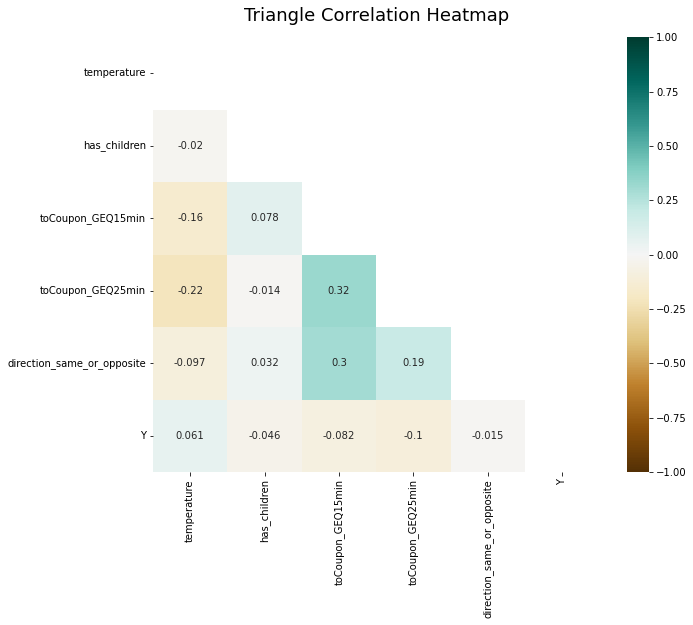

time: 173 ms (started: 2022-10-11 12:54:43 -07:00)


In [40]:
#correlation heatmap

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<font size="5"><a id='[Data_Wrangling]'></a> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

In [41]:
#Feature Engineering

time: 163 µs (started: 2022-10-11 12:54:43 -07:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

In [42]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)
p(df_indicator_numeric_features)


(12684, 118)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,55,1,0,0,1
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,80,1,0,0,1
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,80,1,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,80,1,1,0,1
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,80,1,1,0,1
12679,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

time: 52 ms (started: 2022-10-11 12:54:43 -07:00)


In [43]:
#standardize and scale feature data frame
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns)

p(df_indicator_numeric_features_standardized_scaled)

(12684, 118)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite
0,-0.585362,1.009347,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,2.305122,-0.584512,-0.576501,-0.434842,-0.482217,-0.678192,-0.365116,1.884878,0.888114,-0.888114,0.973698,-0.973698,1.944480,-0.502733,-0.437659,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,-0.774011,2.191433,-0.101761,-0.316214,-0.720572,-0.413491,-0.277185,-0.083584,1.383905,-0.118279,-0.228424,-0.059,-0.211685,-0.13917,-0.353365,-0.110863,-0.283402,-0.058323,-0.155111,-0.140051,-0.139464,-0.102941,-0.132549,-0.116554,-0.265972,-0.230328,-0.118279,-0.093532,-0.118279,-0.20152,-0.307079,-0.37776,-0.132241,2.404764,-0.398206,-0.410742,-0.434329,2.455025,-0.387913,-0.267329,-0.269186,-0.275533,-0.299171,-0.040723,-0.041683,-0.041683,-0.040723,-0.041683,0.09267,-0.492128,-0.304458,-0.615139,-0.168207,1.200266,-0.092237,-0.583905,-0.404561,-0.603339,-0.309838,1.811696,-0.131932,-0.763626,-0.710873,-0.414014,-0.379121,-0.110498,9.110434,-0.85769,1.594684,-0.444545,-0.335752,-0.132856,-0.101761,1.689769,-0.246759,-0.959053,-0.145795,-0.450003,-0.122988,-0.433430,1.189378,-1.131581,-0.367745,0.522967
1,-0.585362,1.009347,-0.576501,-1.165358,1.686999,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,2.139015,-0.433432,-0.433816,-0.584512,-0.576501,-0.434

time: 71.7 ms (started: 2022-10-11 12:54:43 -07:00)


In [44]:
p(df_target)

(12684, 1)


,Y
0,1
1,0
2,1
3,0
4,0
12679,1
12680,1
12681,0
12682,0
12683,0


time: 2.99 ms (started: 2022-10-11 12:54:43 -07:00)


In [45]:
#split the data into train and test

time: 171 µs (started: 2022-10-11 12:54:43 -07:00)


In [46]:
#what is a good split? 70 30?, 80 20?, 90 10???


#get 80 20 for train and test

from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200, stratify=df_target)

#using the class label is the default for stratification

#using the target for stratification introduce some kind of bias??? maybe no??



time: 45.6 ms (started: 2022-10-11 12:54:43 -07:00)


In [47]:
p(X_train)

(10147, 118)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite
4946,1.708345,-0.990740,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,-0.678192,2.738858,-0.530538,-1.125982,1.125982,-1.027012,1.027012,-0.514276,-0.502733,2.284884,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,1.291972,-0.456322,-0.101761,-0.316214,-0.720572,-0.413491,3.607696,-0.083584,-0.722593,-0.118279,-0.228424,-0.059,-0.211685,-0.13917,-0.353365,-0.110863,-0.283402,-0.058323,-0.155111,-0.140051,-0.139464,-0.102941,-0.132549,-0.116554,-0.265972,-0.230328,-0.118279,10.691543,-0.118279,-0.20152,-0.307079,-0.377760,-0.132241,-0.415841,-0.398206,-0.410742,2.302399,-0.407328,-0.387913,-0.267329,-0.269186,-0.275533,-0.299171,-0.040723,-0.041683,-0.041683,-0.040723,-0.041683,0.09267,2.031992,-0.304458,-0.615139,-0.168207,-0.833149,-0.092237,-0.583905,-0.404561,-0.603339,-0.309838,1.811696,-0.131932,-0.763626,1.406721,-0.414014,-0.379121,-0.110498,-0.109764,1.165922,-0.627084,-0.444545,-0.335752,-0.132856,-0.101761,-0.591797,-0.246759,1.042696,-0.145795,-0.450003,-0.122988,-0.433430,-0.840776,0.883720,-0.367745,0.522967
7280,-0.585362,-0.990740,1.734604,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,2.833330,-1.962263,-0.467505,-0.433432,-0.433816,-0.584512,1.7346

time: 51.4 ms (started: 2022-10-11 12:54:43 -07:00)


In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10147, 118) (2537, 118) (10147, 1) (2537, 1)
time: 765 µs (started: 2022-10-11 12:54:43 -07:00)


In [49]:
#this filtered survey as a dataset is our best approximation of the population????

#how do we know what the population is??? the population is those are targeting to coupon recommendation??? we are defining the population then???

#we could go the route of create ML based on the general population???? i mean there is already biased based on who would take a survey???
#i am assuming there is a bias for lower income individuals in surveys because they take time and don't pay well

#what is the demographic distribution of america by income??? <--- not going to be our target audience because coupon users and survey takers
#are going to be lower income than the general population of america.

#there is an inherit bias because coupon users and survey takers are different???


time: 372 µs (started: 2022-10-11 12:54:43 -07:00)


In [50]:
#we don't know what are target audience of coupon acceptor is, this what we are trying to figure out!!

#class label stratification seems to make sense here then???



time: 173 µs (started: 2022-10-11 12:54:43 -07:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Random Forest Classifier 5-Fold Cross Validation Accuracy

In [51]:
#initialize variables
model_version='2dot5'
model_filename='best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier_v' + model_version + '.pkl'


time: 251 µs (started: 2022-10-11 12:54:43 -07:00)


In [52]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename)
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validationn

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
        'min_samples_leaf':[1, 2, 3],
        'n_estimators': [200]
    }

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    #Stratified 5-Fold oject
    StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation = GridSearchCV(estimator=random_forest_classifier, 
                                                     param_grid=param_grid, 
                                                     cv=StratifiedKFold_5_splits,
                                                     n_jobs=-1, 
                                                     verbose=0)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation.fit(X_train, y_train.loc[:, 'Y'])

    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    

    
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in X_train.columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model2(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename,
                                                                                                              add_compressed_file=True)
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=3,
                       n_estimators=200, random_state=200)

time: 157 ms (started: 2022-10-11 12:54:43 -07:00)


In [53]:
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.max_leaf_nodes


time: 222 µs (started: 2022-10-11 12:54:44 -07:00)


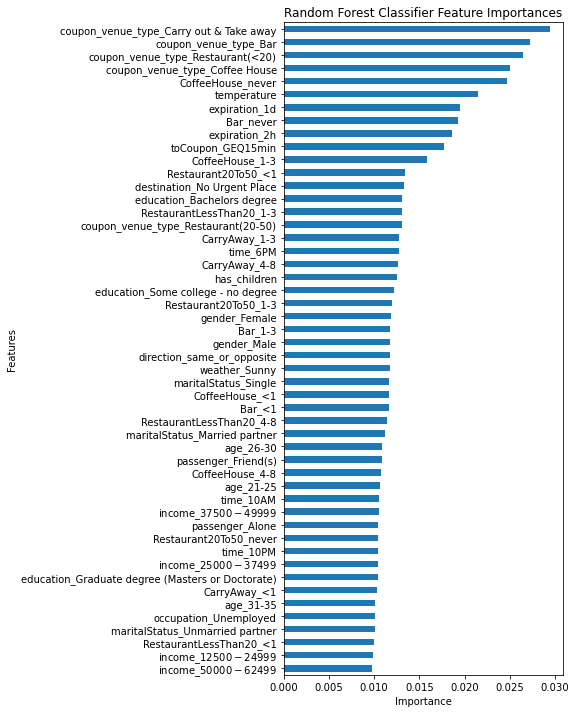

time: 544 ms (started: 2022-10-11 12:54:44 -07:00)


In [54]:
#get feature importants plot


plt.subplots(figsize=(5, 12))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:50].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Feature Importances');

In [55]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

50


['coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'coupon_venue_type_Coffee House',
 'CoffeeHouse_never',
 'temperature',
 'expiration_1d',
 'Bar_never',
 'expiration_2h',
 'toCoupon_GEQ15min',
 'CoffeeHouse_1-3',
 'Restaurant20To50_<1',
 'destination_No Urgent Place',
 'education_Bachelors degree',
 'RestaurantLessThan20_1-3',
 'coupon_venue_type_Restaurant(20-50)',
 'CarryAway_1-3',
 'time_6PM',
 'CarryAway_4-8',
 'has_children',
 'education_Some college - no degree',
 'Restaurant20To50_1-3',
 'gender_Female',
 'Bar_1-3',
 'gender_Male',
 'direction_same_or_opposite',
 'weather_Sunny',
 'maritalStatus_Single',
 'CoffeeHouse_<1',
 'Bar_<1',
 'RestaurantLessThan20_4-8',
 'maritalStatus_Married partner',
 'age_26-30',
 'passenger_Friend(s)',
 'CoffeeHouse_4-8',
 'age_21-25',
 'time_10AM',
 'income_$37500 - $49999',
 'passenger_Alone',
 'Restaurant20To50_never',
 'time_10PM',
 'income_$25000 - $37499',
 'education_Graduate degree

time: 2.39 ms (started: 2022-10-11 12:54:44 -07:00)


In [56]:
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

25


['coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'coupon_venue_type_Coffee House',
 'CoffeeHouse_never',
 'temperature',
 'expiration_1d',
 'Bar_never',
 'expiration_2h',
 'toCoupon_GEQ15min',
 'CoffeeHouse_1-3',
 'Restaurant20To50_<1',
 'destination_No Urgent Place',
 'education_Bachelors degree',
 'RestaurantLessThan20_1-3',
 'coupon_venue_type_Restaurant(20-50)',
 'CarryAway_1-3',
 'time_6PM',
 'CarryAway_4-8',
 'has_children',
 'education_Some college - no degree',
 'Restaurant20To50_1-3',
 'gender_Female',
 'Bar_1-3',
 'gender_Male']

time: 1.64 ms (started: 2022-10-11 12:54:44 -07:00)


In [57]:
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)

26


['coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'coupon_venue_type_Coffee House',
 'CoffeeHouse_never',
 'temperature',
 'expiration_1d',
 'Bar_never',
 'expiration_2h',
 'toCoupon_GEQ15min',
 'CoffeeHouse_1-3',
 'Restaurant20To50_<1',
 'destination_No Urgent Place',
 'education_Bachelors degree',
 'RestaurantLessThan20_1-3',
 'coupon_venue_type_Restaurant(20-50)',
 'CarryAway_1-3',
 'time_6PM',
 'CarryAway_4-8',
 'has_children',
 'education_Some college - no degree',
 'Restaurant20To50_1-3',
 'gender_Female',
 'Bar_1-3',
 'gender_Male',
 'Y']

time: 1.66 ms (started: 2022-10-11 12:54:44 -07:00)


In [58]:
df_train = pd.concat([X_train, y_train], axis=1)
p(df_train)

(10147, 119)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
4946,1.708345,-0.990740,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,-0.678192,2.738858,-0.530538,-1.125982,1.125982,-1.027012,1.027012,-0.514276,-0.502733,2.284884,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,1.291972,-0.456322,-0.101761,-0.316214,-0.720572,-0.413491,3.607696,-0.083584,-0.722593,-0.118279,-0.228424,-0.059,-0.211685,-0.13917,-0.353365,-0.110863,-0.283402,-0.058323,-0.155111,-0.140051,-0.139464,-0.102941,-0.132549,-0.116554,-0.265972,-0.230328,-0.118279,10.691543,-0.118279,-0.20152,-0.307079,-0.377760,-0.132241,-0.415841,-0.398206,-0.410742,2.302399,-0.407328,-0.387913,-0.267329,-0.269186,-0.275533,-0.299171,-0.040723,-0.041683,-0.041683,-0.040723,-0.041683,0.09267,2.031992,-0.304458,-0.615139,-0.168207,-0.833149,-0.092237,-0.583905,-0.404561,-0.603339,-0.309838,1.811696,-0.131932,-0.763626,1.406721,-0.414014,-0.379121,-0.110498,-0.109764,1.165922,-0.627084,-0.444545,-0.335752,-0.132856,-0.101761,-0.591797,-0.246759,1.042696,-0.145795,-0.450003,-0.122988,-0.433430,-0.840776,0.883720,-0.367745,0.522967,1
7280,-0.585362,-0.990740,1.734604,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,2.833330,-1.962263,-0.467505,-0.433432,-0.433816,-0.584512,1.

time: 51.9 ms (started: 2022-10-11 12:54:44 -07:00)


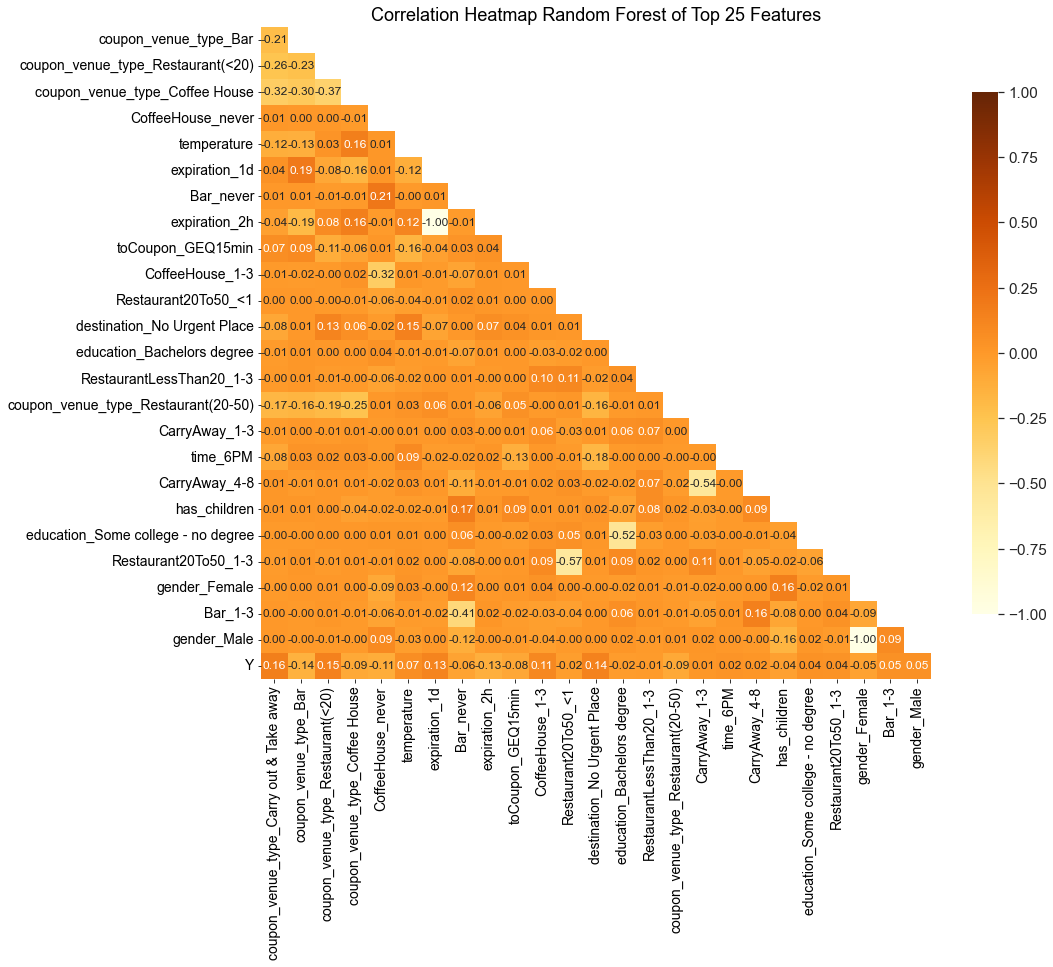

time: 4.67 s (started: 2022-10-11 12:54:44 -07:00)


In [59]:
#correlation heatmap of top features and target

df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance_target].corr() #correlation type??

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25.png', bbox_inches='tight', dpi=600)

plt.show()

In [82]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expirate - time til expiration

#CoffeeHouse - coffee house visits per month

25


['coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'coupon_venue_type_Coffee House',
 'CoffeeHouse_never',
 'temperature',
 'expiration_1d',
 'Bar_never',
 'expiration_2h',
 'toCoupon_GEQ15min',
 'CoffeeHouse_1-3',
 'Restaurant20To50_<1',
 'destination_No Urgent Place',
 'education_Bachelors degree',
 'RestaurantLessThan20_1-3',
 'coupon_venue_type_Restaurant(20-50)',
 'CarryAway_1-3',
 'time_6PM',
 'CarryAway_4-8',
 'has_children',
 'education_Some college - no degree',
 'Restaurant20To50_1-3',
 'gender_Female',
 'Bar_1-3',
 'gender_Male']

time: 10.3 ms (started: 2022-10-11 13:01:48 -07:00)


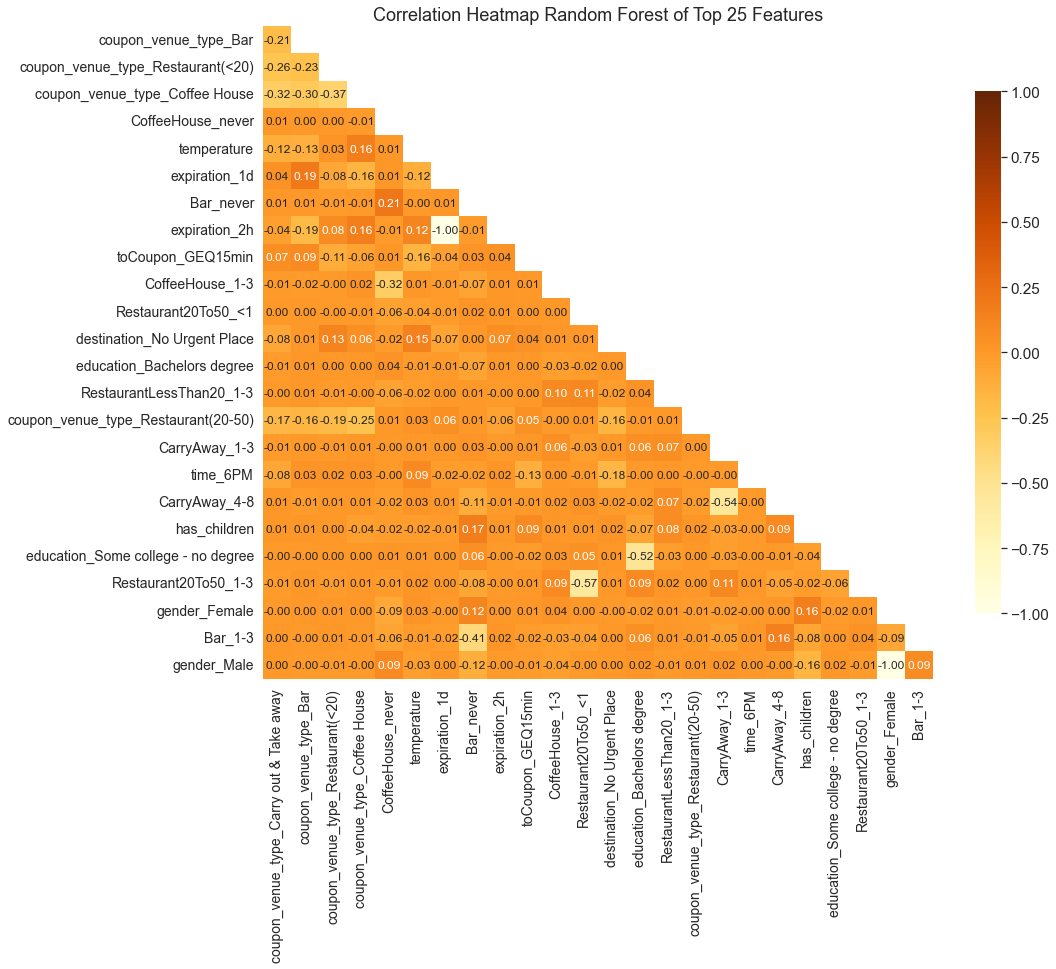

time: 4.45 s (started: 2022-10-11 12:54:49 -07:00)


In [60]:
#correlation heatmap of top features

df_corr = X_train.loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25.png', bbox_inches='tight', dpi=600)

plt.show()

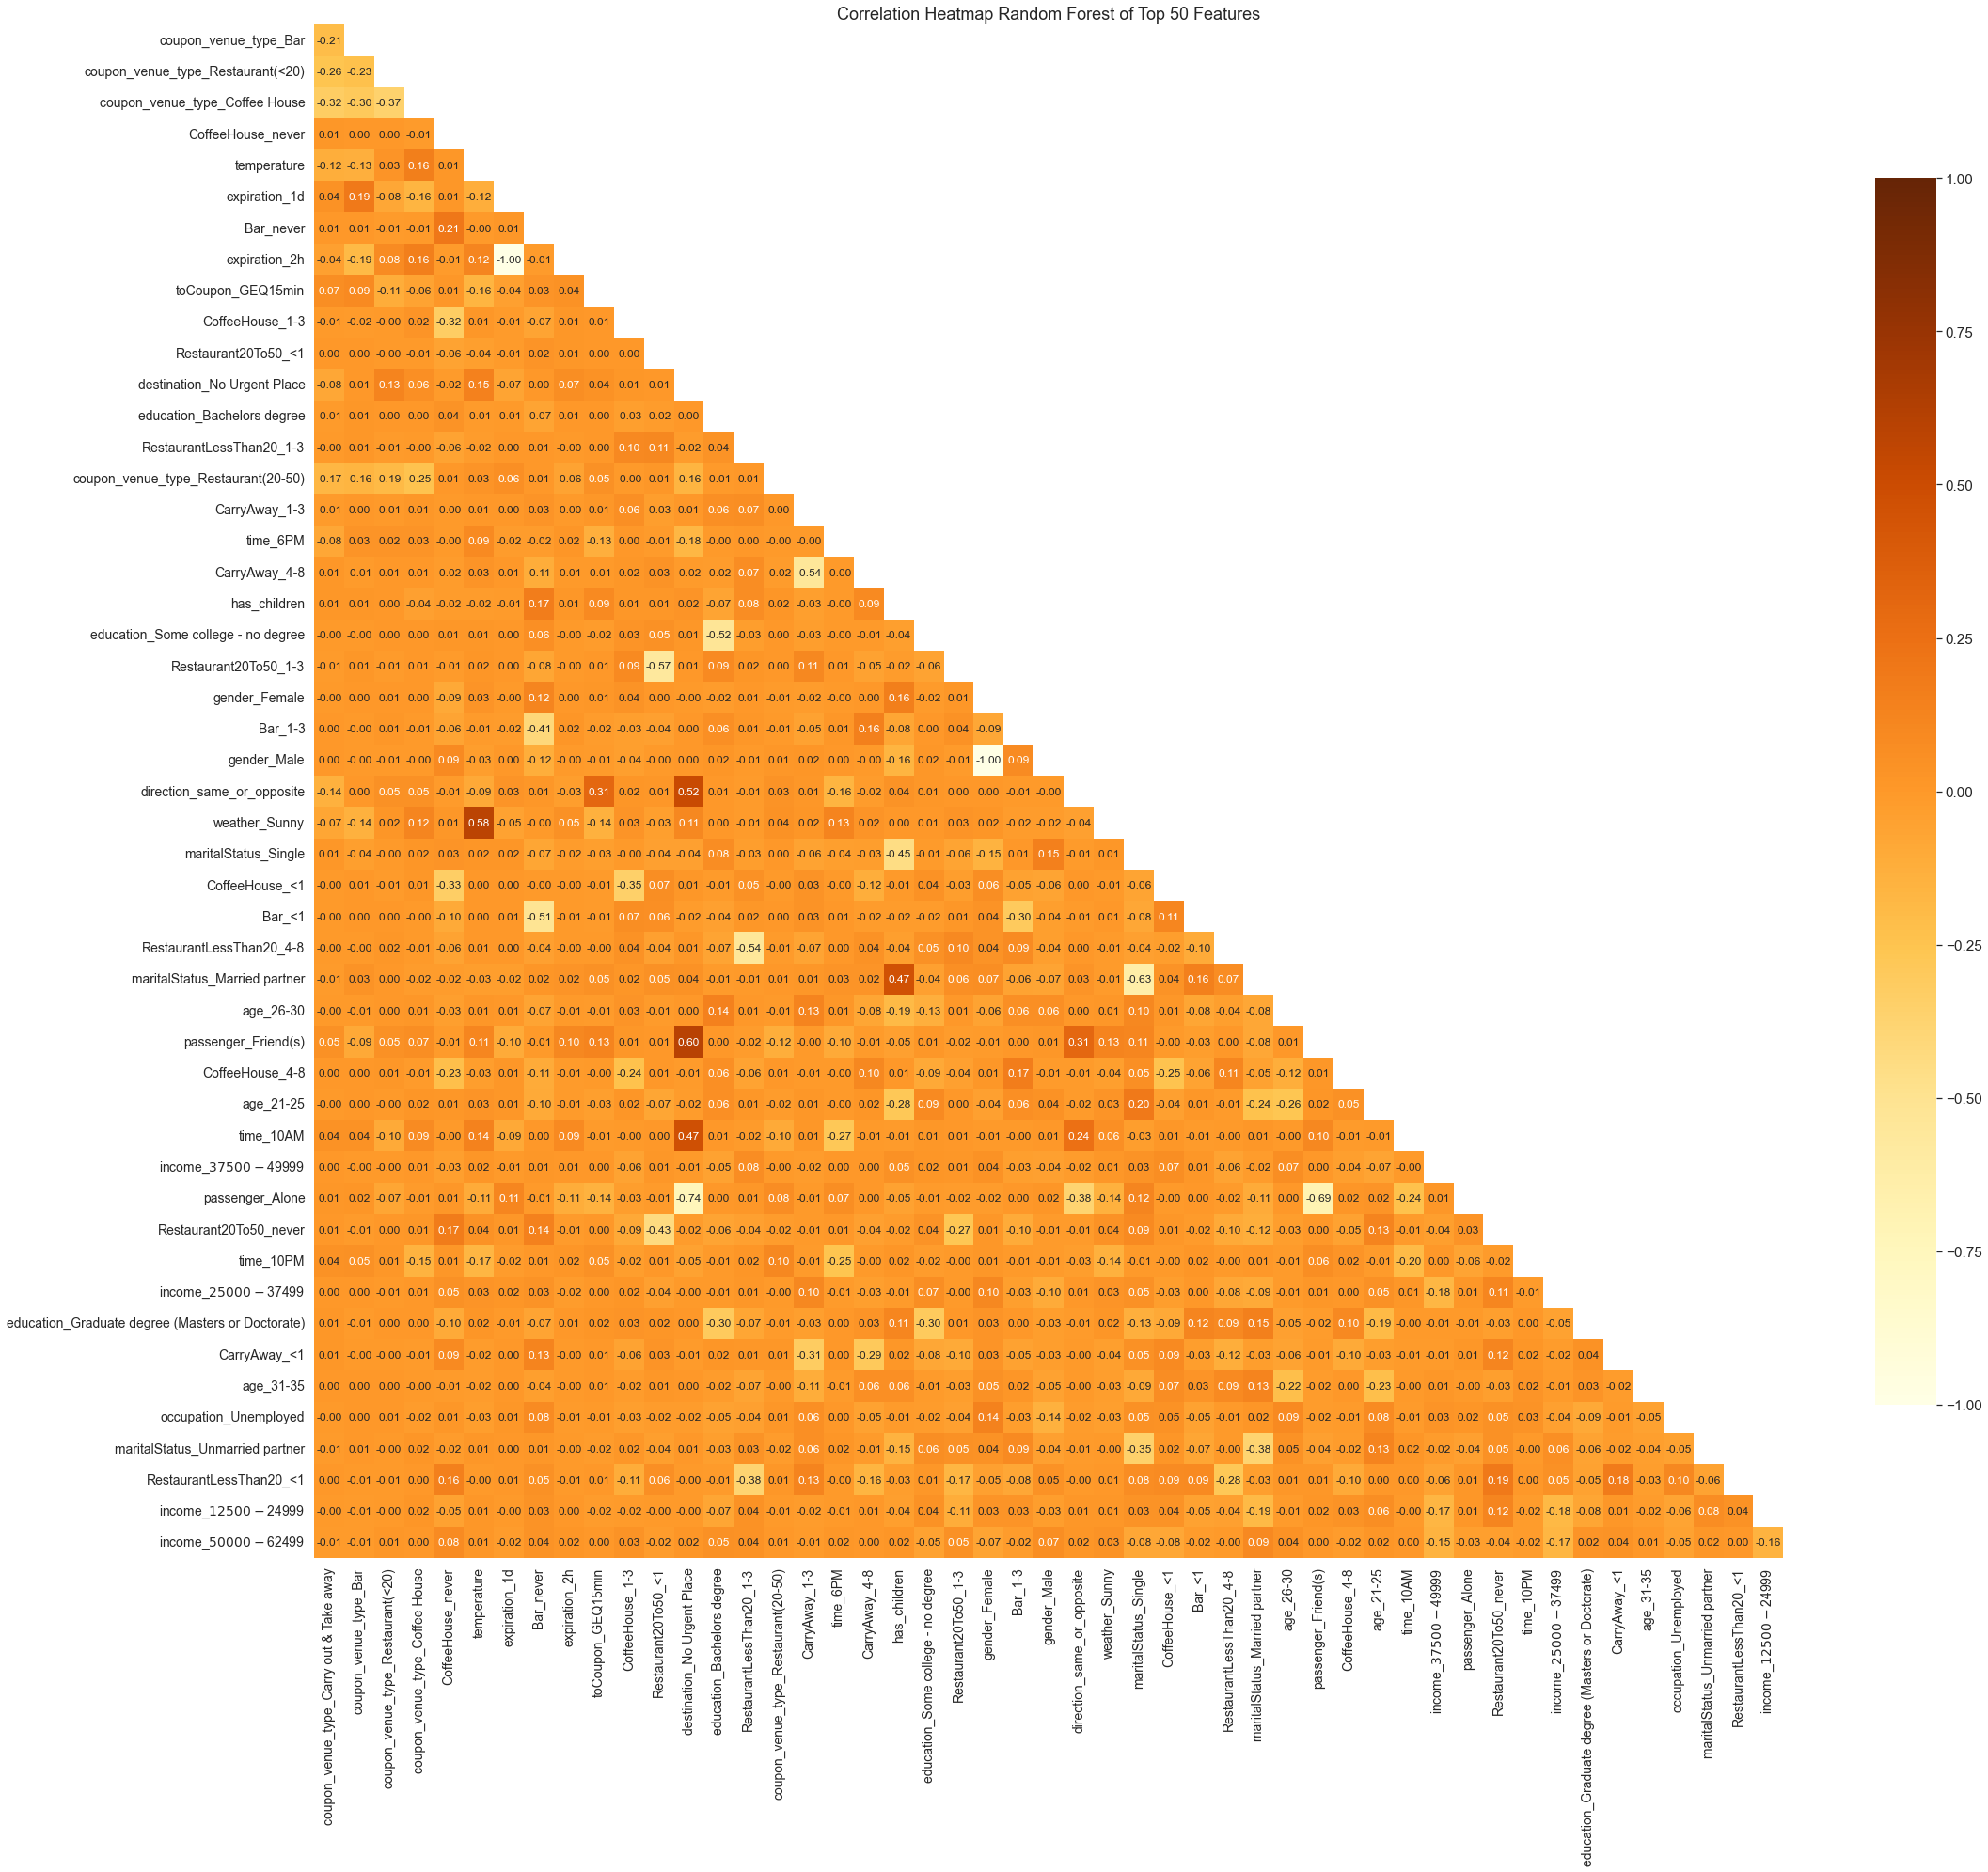

time: 16.8 s (started: 2022-10-11 12:54:53 -07:00)


In [61]:
#correlation heatmap of top features

df_corr = X_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(35, 30))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 50 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50.png', bbox_inches='tight', dpi=600)

plt.show()

25


['coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'coupon_venue_type_Coffee House',
 'CoffeeHouse_never',
 'temperature',
 'expiration_1d',
 'Bar_never',
 'expiration_2h',
 'toCoupon_GEQ15min',
 'CoffeeHouse_1-3',
 'Restaurant20To50_<1',
 'destination_No Urgent Place',
 'education_Bachelors degree',
 'RestaurantLessThan20_1-3',
 'coupon_venue_type_Restaurant(20-50)',
 'CarryAway_1-3',
 'time_6PM',
 'CarryAway_4-8',
 'has_children',
 'education_Some college - no degree',
 'Restaurant20To50_1-3',
 'gender_Female',
 'Bar_1-3',
 'gender_Male']

time: 12.5 ms (started: 2022-10-11 12:58:25 -07:00)


In [63]:
# %%time
# #5-fold or whatever-fold cross validation

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

# random_forest_classifier = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=100, random_state=200)
# scores = cross_val_score(random_forest_classifier, X_train, y_train.loc[:, 'Y'], cv=5)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

time: 264 µs (started: 2022-10-11 12:55:10 -07:00)


In [64]:
#stratified 5-fold cv????


time: 124 µs (started: 2022-10-11 12:55:10 -07:00)


In [65]:
#random forest hyperparameter tuning

time: 122 µs (started: 2022-10-11 12:55:10 -07:00)


In [66]:
#random forest classifier hyperparameters

#https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

time: 157 µs (started: 2022-10-11 12:55:10 -07:00)


In [67]:
#results of random search????


time: 121 µs (started: 2022-10-11 12:55:10 -07:00)


In [68]:
#selecting number of base estimators, i.e. decision trees

#https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred

time: 183 µs (started: 2022-10-11 12:55:10 -07:00)


In [69]:
#min_samples_split vs min_samples_leaf

#https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

time: 166 µs (started: 2022-10-11 12:55:10 -07:00)


In [70]:
#how to show correlation for feature categories and boolean target variable???

#explain at the feature indicator level or the muli-category feature level???



time: 175 µs (started: 2022-10-11 12:55:10 -07:00)


In [71]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = (predictions == test_labels.loc[:, 'Y']).value_counts('True')
    return accuracy

grid_accuracy = evaluate(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, X_train, y_train)
grid_accuracy

True     0.997733
False    0.002267
Name: Y, dtype: float64

time: 332 ms (started: 2022-10-11 12:55:10 -07:00)


In [72]:
df_target_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(X_train)

(df_target_predicted == y_train.loc[:, 'Y']).value_counts('True')

True     0.997733
False    0.002267
Name: Y, dtype: float64

time: 295 ms (started: 2022-10-11 12:55:11 -07:00)


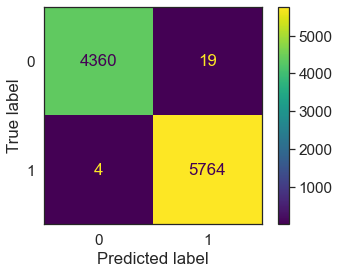

time: 78.5 ms (started: 2022-10-11 12:55:11 -07:00)


In [73]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, df_target_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [74]:
# import pandas as pd
# import seaborn as sn
# import matplotlib.pyplot as plt


# confusion_matrix = pd.crosstab(y_train.loc[:, 'Y'], df_target_predicted, rownames=['Actual'], colnames=['Predicted'], margins = True)

# sn.heatmap(confusion_matrix, annot=True)
# plt.show()

# #fix to standard form instead of scientific notation???

time: 269 µs (started: 2022-10-11 12:55:11 -07:00)


<font size="5"><a id='[Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Results]'>**Results**</a> </font>

In [75]:
# grid_accuracy = evaluate(best_grid_cross_validation_random_forest_classifier, X_test, y_test.loc[:, 'Y'])
# grid_accuracy

time: 205 µs (started: 2022-10-11 12:55:11 -07:00)


In [76]:
# !conda install wordcloud

time: 155 µs (started: 2022-10-11 12:55:11 -07:00)


In [77]:
# !pip install autoviz

time: 148 µs (started: 2022-10-11 12:55:11 -07:00)


In [78]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# help(AV.AutoViz)

time: 184 µs (started: 2022-10-11 12:55:11 -07:00)


In [79]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTrain.csv'))

time: 204 µs (started: 2022-10-11 12:55:11 -07:00)


In [80]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTest.csv'))

time: 165 µs (started: 2022-10-11 12:55:11 -07:00)
